<a href="https://colab.research.google.com/github/AmindaUdayanga/Feature-Engineered-Rice-yield-Prediction-based-on-Weather-Data/blob/master/feature_engineered_Anuradhapura_Maha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import pandas as pd
from array import *
import math

##All datasets

In [5]:
df1 = pd.read_csv('/content/drive/MyDrive/ML_research/Am.csv')
dataset1="Anuradhapura maha kannaya"

In [6]:
df2 = pd.read_csv('/content/drive/MyDrive/ML_research/Ay.csv')
dataset2="Anuradhapura yala kannaya"

In [7]:
df3 = pd.read_csv('/content/drive/MyDrive/ML_research/Km.csv')
dataset3="Kurunegala maha kannaya"

In [8]:
df4 = pd.read_csv('/content/drive/MyDrive/ML_research/Ky.csv')
dataset4="Kurunegala yala kannaya"

In [9]:
#"Anuradhapura maha kannaya"
df = df1


dataset=dataset1
print(df)


    year        X1         X2         X3         X4   X5  X6  X7   X8  X9  \
0   1982   638.000  30.856250  33.463636  27.500000   80  11  32  119   4   
1   1983   958.200  30.702817  34.737037  27.292000   71  27  25  110  13   
2   1984   650.200  30.578889  33.233333  27.575000   90   9  24  123   0   
3   1985   821.400  30.459302  33.371429  26.796667   86   7  30  116   7   
4   1986   392.600  30.618817  33.744444  27.990476   93   9  21  102  21   
5   1987   813.200  31.009184  33.336364  27.942857   98  11  14  120   3   
6   1988   815.893  30.591040   0.000000  28.334416  112   0  11  123   0   
7   1989   850.100  30.628571  33.622222  28.034783   91   9  23  112  11   
8   1990   779.000  30.526923  34.192857  27.480645   78  14  31  114   9   
9   1991   702.800  30.512329  34.030000  28.002500   73  10  40  113  10   
10  1992   661.600  30.747887  33.220000  28.068085   71   5  47  115   8   
11  1993  1352.900  30.583824  33.500000  27.381481   68   1  54  118   5   

##pre processing

In [10]:
#Delete row whose column value is equal to 0
df = df.drop(df.index[df['X2'] == 0])
df = df.drop(df.index[df['X3'] == 0])
df = df.drop(df.index[df['X4'] == 0])
df = df.drop(df.index[df['X10'] == 0])
df = df.drop(df.index[df['X11'] == 0])
df.size

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
print(df)

    year       X1         X2         X3         X4   X5  X6  X7   X8  X9  \
0   1982   638.00  30.856250  33.463636  27.500000   80  11  32  119   4   
1   1983   958.20  30.702817  34.737037  27.292000   71  27  25  110  13   
3   1985   821.40  30.459302  33.371429  26.796667   86   7  30  116   7   
4   1986   392.60  30.618817  33.744444  27.990476   93   9  21  102  21   
5   1987   813.20  31.009184  33.336364  27.942857   98  11  14  120   3   
7   1989   850.10  30.628571  33.622222  28.034783   91   9  23  112  11   
8   1990   779.00  30.526923  34.192857  27.480645   78  14  31  114   9   
9   1991   702.80  30.512329  34.030000  28.002500   73  10  40  113  10   
10  1992   661.60  30.747887  33.220000  28.068085   71   5  47  115   8   
11  1993  1352.90  30.583824  33.500000  27.381481   68   1  54  118   5   
13  1995   828.50  30.405128  34.075000  27.908000   78  20  25  109  14   
14  1996   497.10  30.746392  33.425000  28.077273   97   4  22  115   8   
15  1997  14

<Axes: >

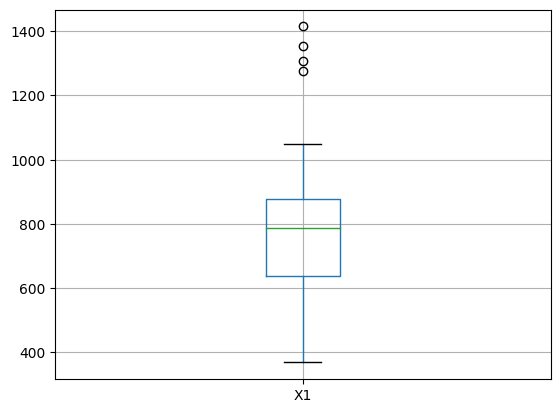

In [11]:
df.boxplot(column=['X1'])

<Axes: >

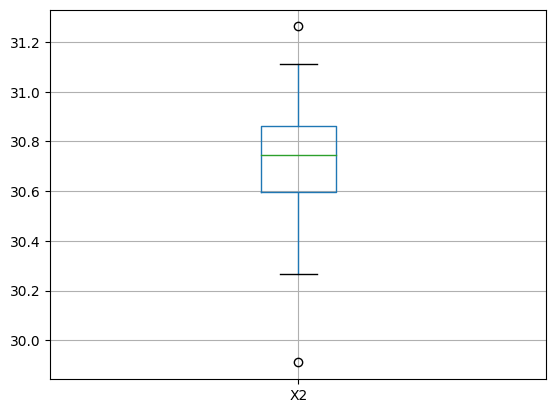

In [12]:
df.boxplot(column=['X2'])


<Axes: >

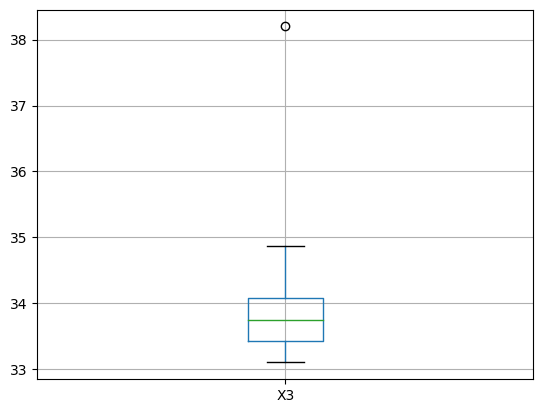

In [13]:
df.boxplot(column=['X3'])


<Axes: >

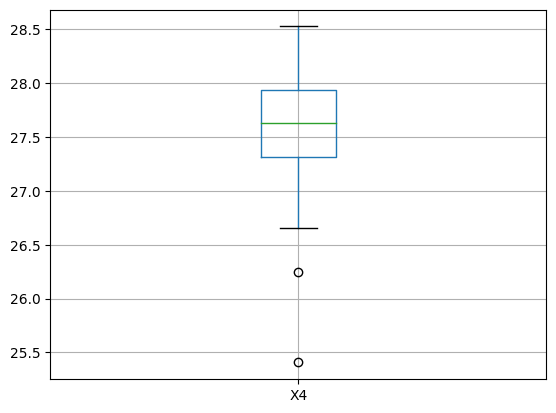

In [14]:
df.boxplot(column=['X4'])


<Axes: >

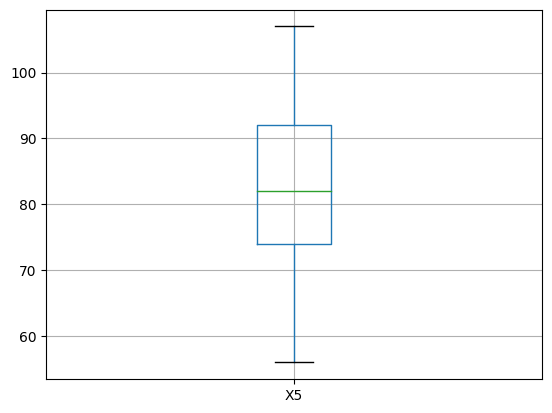

In [15]:
df.boxplot(column=['X5'])


<Axes: >

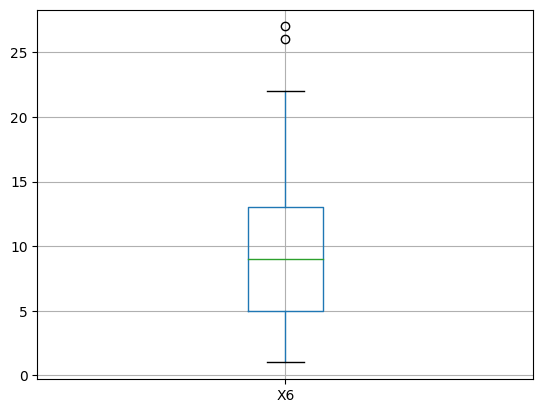

In [16]:
df.boxplot(column=['X6'])


<Axes: >

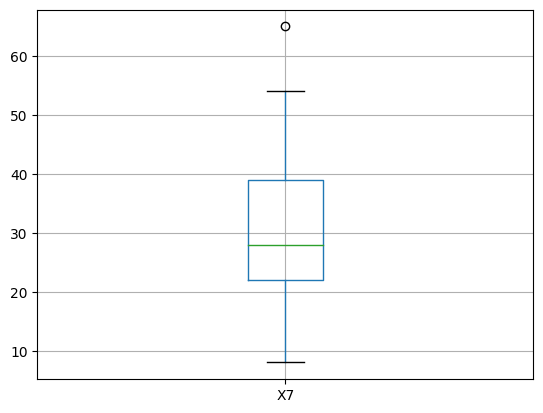

In [17]:
df.boxplot(column=['X7'])


<Axes: >

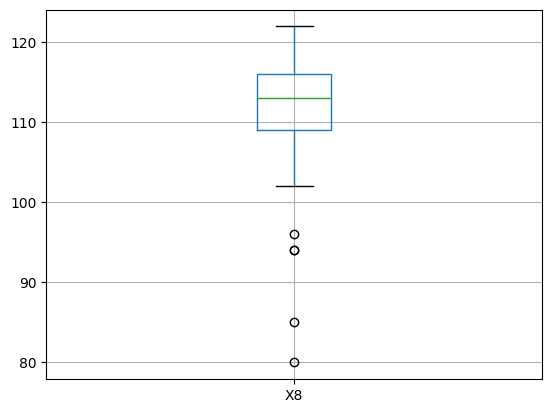

In [18]:
df.boxplot(column=['X8'])


<Axes: >

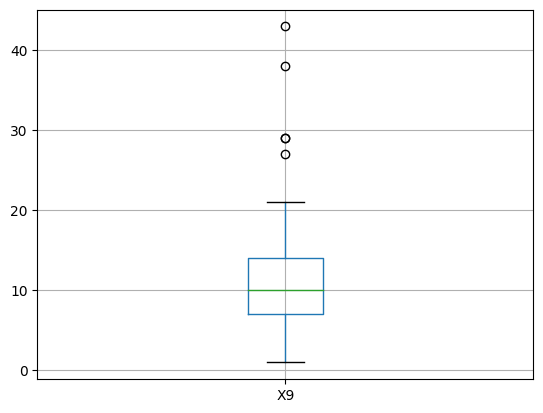

In [19]:
df.boxplot(column=['X9'])


<Axes: >

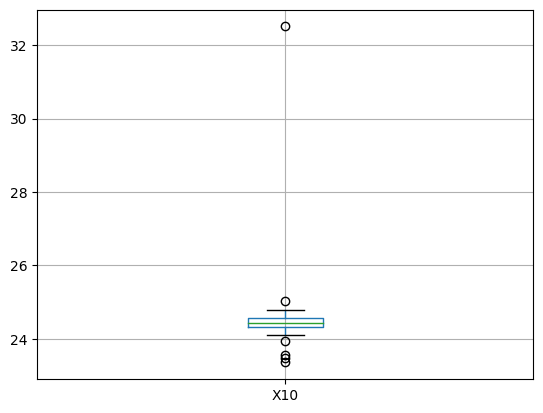

In [20]:
df.boxplot(column=['X10'])


<Axes: >

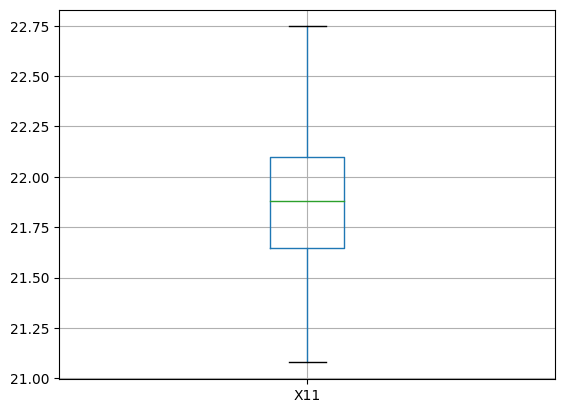

In [21]:
df.boxplot(column=['X11'])

In [22]:
df['X1'] = np.where(df['X1'] < (df['X1'].quantile(0.10)), (df['X1'].quantile(0.10)),df['X1'])
df['X1'] = np.where(df['X1'] >(df['X1'].quantile(0.90)), (df['X1'].quantile(0.90)),df['X1'])

df['X2'] = np.where(df['X2'] < (df['X2'].quantile(0.10)), (df['X2'].quantile(0.10)),df['X2'])
df['X2'] = np.where(df['X2'] >(df['X2'].quantile(0.90)), (df['X2'].quantile(0.90)),df['X2'])

df['X3'] = np.where(df['X3'] < (df['X3'].quantile(0.10)), (df['X3'].quantile(0.10)),df['X3'])
df['X3'] = np.where(df['X3'] >(df['X3'].quantile(0.90)), (df['X3'].quantile(0.90)),df['X3'])

df['X4'] = np.where(df['X4'] < (df['X4'].quantile(0.10)), (df['X4'].quantile(0.10)),df['X4'])
df['X4'] = np.where(df['X4'] >(df['X4'].quantile(0.90)), (df['X4'].quantile(0.90)),df['X4'])

df['X5'] = np.where(df['X5'] < (df['X5'].quantile(0.10)), (df['X5'].quantile(0.10)),df['X5'])
df['X5'] = np.where(df['X5'] >(df['X5'].quantile(0.90)), (df['X5'].quantile(0.90)),df['X5'])

df['X6'] = np.where(df['X6'] < (df['X6'].quantile(0.10)), (df['X6'].quantile(0.10)),df['X6'])
df['X6'] = np.where(df['X6'] >(df['X6'].quantile(0.90)), (df['X6'].quantile(0.90)),df['X6'])

df['X7'] = np.where(df['X7'] < (df['X7'].quantile(0.10)), (df['X7'].quantile(0.10)),df['X7'])
df['X7'] = np.where(df['X7'] >(df['X7'].quantile(0.90)), (df['X7'].quantile(0.90)),df['X7'])

df['X8'] = np.where(df['X8'] < (df['X8'].quantile(0.10)), (df['X8'].quantile(0.10)),df['X8'])
df['X8'] = np.where(df['X8'] >(df['X8'].quantile(0.90)), (df['X8'].quantile(0.90)),df['X8'])

df['X9'] = np.where(df['X9'] < (df['X9'].quantile(0.10)), (df['X9'].quantile(0.10)),df['X9'])
df['X9'] = np.where(df['X9'] >(df['X9'].quantile(0.90)), (df['X9'].quantile(0.90)),df['X9'])

df['X10'] = np.where(df['X10'] < (df['X10'].quantile(0.10)), (df['X10'].quantile(0.10)),df['X10'])
df['X10'] = np.where(df['X10'] >(df['X10'].quantile(0.90)), (df['X10'].quantile(0.90)),df['X10'])

df['X11'] = np.where(df['X11'] < (df['X11'].quantile(0.10)), (df['X11'].quantile(0.10)),df['X11'])
df['X11'] = np.where(df['X11'] >(df['X11'].quantile(0.90)), (df['X11'].quantile(0.90)),df['X11'])



In [23]:

def bias_value(y_test, y_pred):
  ytest_list = list(y_test.values)
  diff=0.0
  avg_diff=0.0
  for i in range(0,len(ytest_list)):
    diff=diff+ytest_list[i]-y_pred[i]

  avg_diff=diff/len(ytest_list)
  return avg_diff

data = {'Method': ['Linear Regression','SVR','MLP','KNN','Random Forest'],
        'RMSE test': [0,0,0,0,0],
        'RMSE train': [0,0,0,0,0],
        'RRMSE test': [0,0,0,0,0],
        'RRMSE train': [0,0,0,0,0],
        'MAE test': [0,0,0,0,0],
        'MAE train': [0,0,0,0,0],
        'R2_score test': [0,0,0,0,0],
        'R2_score train': [0,0,0,0,0],
        'Bias test': [0,0,0,0,0],
        'Bias train': [0,0,0,0,0],
        }
test_acc = {'Method': ['Linear Regression','SVR','MLP','KNN','Random Forest'],
        'RMSE test': [0,0,0,0,0],
        'RRMSE test': [0,0,0,0,0],
        'MAE test': [0,0,0,0,0],
        'R2_score test': [0,0,0,0,0],
        'Bias test': [0,0,0,0,0]
        }

df_train = pd.DataFrame(data, columns = ['Method', 'RMSE test','RMSE train','RRMSE test','RRMSE train','MAE test','MAE train','R2_score test','R2_score train','Bias test','Bias train'])
print(df_train)
test_percentage = 0.3
test_size = math.floor(len(df.index)*test_percentage)


df_train = df[:-test_size]
df_test = df[-test_size:]


              Method  RMSE test  RMSE train  RRMSE test  RRMSE train  \
0  Linear Regression          0           0           0            0   
1                SVR          0           0           0            0   
2                MLP          0           0           0            0   
3                KNN          0           0           0            0   
4      Random Forest          0           0           0            0   

   MAE test  MAE train  R2_score test  R2_score train  Bias test  Bias train  
0         0          0              0               0          0           0  
1         0          0              0               0          0           0  
2         0          0              0               0          0           0  
3         0          0              0               0          0           0  
4         0          0              0               0          0           0  


In [24]:
print(df_train)

    year       X1         X2         X3         X4    X5    X6    X7     X8  \
0   1982   638.00  30.856250  33.463636  27.500000  80.0  11.0  32.0  119.0   
1   1983   958.20  30.702817  34.737037  27.292000  71.0  20.0  25.0  110.0   
3   1985   821.40  30.469908  33.371429  26.805712  86.0   7.0  30.0  116.0   
4   1986   498.04  30.618817  33.744444  27.990476  93.0   9.0  21.0  102.0   
5   1987   813.20  31.009184  33.336364  27.942857  98.0  11.0  17.2  119.8   
7   1989   850.10  30.628571  33.622222  28.034783  91.0   9.0  23.0  112.0   
8   1990   779.00  30.526923  34.192857  27.480645  78.0  14.0  31.0  114.0   
9   1991   702.80  30.512329  34.030000  28.002500  73.0  10.0  40.0  113.0   
10  1992   661.60  30.747887  33.280606  28.037924  71.0   5.0  46.6  115.0   
11  1993  1230.32  30.583824  33.500000  27.381481  68.2   1.2  46.6  118.0   
13  1995   828.50  30.469908  34.075000  27.908000  78.0  20.0  25.0  109.0   
14  1996   498.04  30.746392  33.425000  28.037924  

Feature: 1, Score: 0.07851
Feature: 2, Score: 0.24650
Feature: 3, Score: 0.33129
Feature: 4, Score: 0.03589
Feature: 5, Score: 0.02286
Feature: 6, Score: 0.03272
Feature: 7, Score: 0.02707
Feature: 8, Score: 0.01093
Feature: 9, Score: 0.02861
Feature: 10, Score: 0.12259
Feature: 11, Score: 0.06304


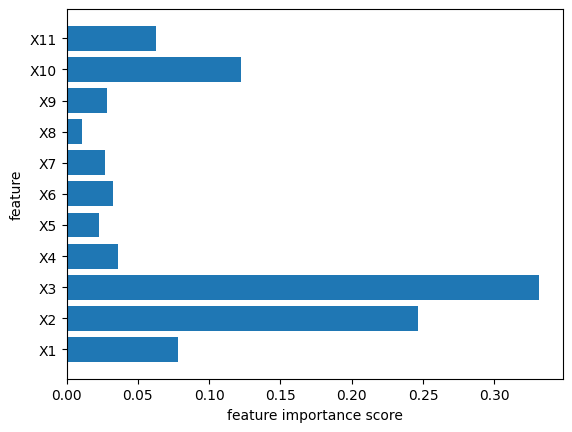

[[0, 0.07850589947059329], [1, 0.24649747852142165], [2, 0.3312895034696119], [3, 0.035888251754657395], [4, 0.022862348126584928], [5, 0.032718879516636656], [6, 0.027066995464018116], [7, 0.010931085340160544], [8, 0.028611737642819244], [9, 0.12258741329870665], [10, 0.06304040739478971]]


In [25]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

X=df_train.drop(['year','prod'], axis=1)
y=df_train['prod']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=42)

feature_names = [f"feature {i}" for i in range(X.shape[1])]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
x_train = pd.DataFrame(X_train)
X_test = scaler.transform(x_test)
x_test = pd.DataFrame(X_test)

rf = RandomForestRegressor(random_state=42)

rf.fit(x_train,y_train)

importance = rf.feature_importances_
# summarize feature importance and assign them to an array 'arr' with the feature index
arr = [[0 for x in range(2)] for y in range(11)]
for i,v in enumerate(importance):
	arr[i][0] = i
	arr[i][1] = v
	print('Feature: %0d, Score: %.5f' % (i+1,v))
# plot feature importance
plt.barh([f'X{x}' for x in range(1,len(importance)+1)], importance)
plt.xlabel("feature importance score")
plt.ylabel("feature")
plt.show()

print(arr)


[[2, 0.3312895034696119], [1, 0.24649747852142165], [9, 0.12258741329870665], [0, 0.07850589947059329], [10, 0.06304040739478971], [3, 0.035888251754657395], [5, 0.032718879516636656], [8, 0.028611737642819244], [6, 0.027066995464018116], [4, 0.022862348126584928], [7, 0.010931085340160544]]


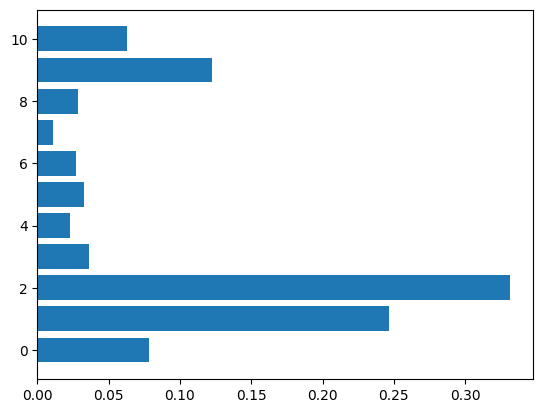

In [26]:
arr.sort(key=lambda row: (row[1]), reverse=True)
print(arr)
plt.barh([x[0] for x in arr],[x[1] for x in arr])
plt.show()


Feature: 8, Score: 0.01093
Feature: 5, Score: 0.02286
Feature: 7, Score: 0.02707
Feature: 9, Score: 0.02861
Feature: 6, Score: 0.03272
Feature: 4, Score: 0.03589
Feature: 11, Score: 0.06304
Feature: 1, Score: 0.07851
Feature: 10, Score: 0.12259
Feature: 2, Score: 0.24650
Feature: 3, Score: 0.33129


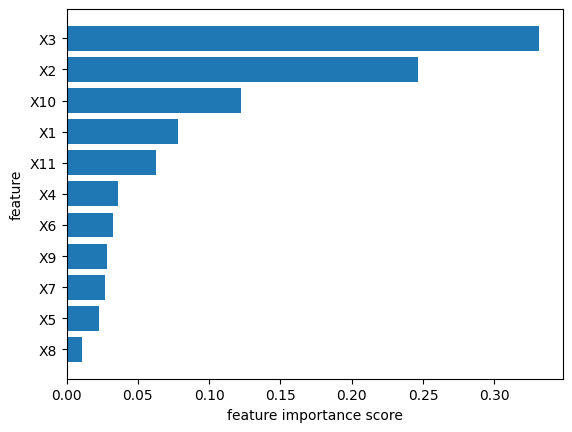

In [27]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

X=df_train.drop(['year','prod'], axis=1)
y=df_train['prod']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=42)

feature_names = [f"feature {i}" for i in range(X.shape[1])]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
x_train = pd.DataFrame(X_train)
X_test = scaler.transform(x_test)
x_test = pd.DataFrame(X_test)

rf = RandomForestRegressor(random_state=42)

rf.fit(x_train,y_train)

importance = rf.feature_importances_
# summarize feature importance and assign them to an list 'list_' with the feature index
list_ = [[0 for x in range(2)] for y in range(11)]
dic = {}
indexes=[]
values=[]
for i,v in enumerate(importance):
	dic[i+1] = v

# plot feature importance
sorted_list = sorted(dic.items(), key=lambda x:x[1],reverse=False)

sorted_dic = dict()
for item in sorted_list:
	sorted_dic[item[0]]=item[1]
	indexes.append(item[0])
	values.append(item[1])
	print('Feature: %0d, Score: %.5f' % (item[0],item[1]))
plt.barh([f'X{x}' for x in indexes], [val for val in  values])
plt.xlabel("feature importance score")
plt.ylabel("feature")
plt.savefig("AM_features.jpg",dpi=1200)
plt.show()


In [28]:
acc_array=list()
#feature_array=list()


cv = KFold(n_splits=5, shuffle=True, random_state=42)

for n in range(1,12):
  num_of_features = n
  #print(num_of_features)
  selected = [0 for y in range(num_of_features)]
  for i in range(num_of_features):
    selected[i] = sorted(arr,key=lambda row: (row[1]), reverse=True)[i]
  print(selected)
  selected_features_list = [0 for y in range(num_of_features)]
  for i in range(num_of_features):
    selected_features_list[i] = df_train.columns[selected[i][0]+1]
  print(selected_features_list)

[[2, 0.3312895034696119]]
['X3']
[[2, 0.3312895034696119], [1, 0.24649747852142165]]
['X3', 'X2']
[[2, 0.3312895034696119], [1, 0.24649747852142165], [9, 0.12258741329870665]]
['X3', 'X2', 'X10']
[[2, 0.3312895034696119], [1, 0.24649747852142165], [9, 0.12258741329870665], [0, 0.07850589947059329]]
['X3', 'X2', 'X10', 'X1']
[[2, 0.3312895034696119], [1, 0.24649747852142165], [9, 0.12258741329870665], [0, 0.07850589947059329], [10, 0.06304040739478971]]
['X3', 'X2', 'X10', 'X1', 'X11']
[[2, 0.3312895034696119], [1, 0.24649747852142165], [9, 0.12258741329870665], [0, 0.07850589947059329], [10, 0.06304040739478971], [3, 0.035888251754657395]]
['X3', 'X2', 'X10', 'X1', 'X11', 'X4']
[[2, 0.3312895034696119], [1, 0.24649747852142165], [9, 0.12258741329870665], [0, 0.07850589947059329], [10, 0.06304040739478971], [3, 0.035888251754657395], [5, 0.032718879516636656]]
['X3', 'X2', 'X10', 'X1', 'X11', 'X4', 'X6']
[[2, 0.3312895034696119], [1, 0.24649747852142165], [9, 0.12258741329870665], [0, 0

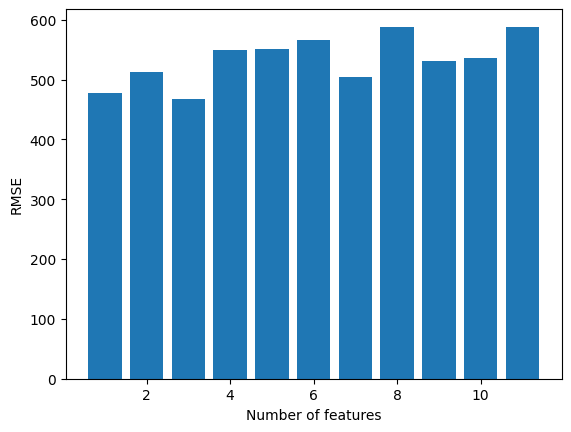

['X3', 'X2', 'X10']
467.36259999999993


In [29]:

acc_array=list()
#feature_array=list()


cv = KFold(n_splits=5, shuffle=True, random_state=42)
min=2000
selected_features_final=list()
for n in range(1,12):
  num_of_features = n
  selected = [[0 for x in range(2)] for y in range(num_of_features)]
  #copy the selected most important n features' indices and their importance to 'selected' array
  for i in range(num_of_features):
    selected[i] = sorted(arr,key=lambda row: (row[1]), reverse=True)[i]
  #assign selected feature columns in 'X' dataset to new dataset 'selected_features'
  selected_features = pd.DataFrame()
  selected_features_list = [0 for y in range(num_of_features)]
  for i in range(num_of_features):
    selected_features[i] = df_train.iloc[:, selected[i][0]+1]
    #print(selected_features)
    selected_features_list[i] = df_train.columns[selected[i][0]+1]
  #print(selected_features_list)
  rmse_test_arr = []
  rrmse_test_arr =[]
  r2_test_arr= []
  mae_test_arr = []

  rmse_train_arr = []
  rrmse_train_arr =[]
  r2_train_arr= []
  mae_train_arr = []

  bias_test_arr = []
  bias_train_arr = []
  #print(selected_features[i])
  for tr, tt in cv.split(df_train): #tr,tt are indexes
    x_train, x_test = selected_features[i].iloc[tr], selected_features[i].iloc[tt]
    y_train, y_test = df_train['prod'].iloc[tr], df_train['prod'].iloc[tt]
    #print(tr,tt)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(pd.DataFrame(x_train))
    X_test = scaler.transform(pd.DataFrame(x_test))
    model =  RandomForestRegressor(n_estimators = 1000, random_state = 42).fit(X_train, y_train)
    y_pred= model.predict(X_test)
    y_pred_train= model.predict(X_train)

    r2_test=r2_score(y_test,y_pred)
    r2_train=r2_score(y_train,y_pred_train)
    #print(r2_test)
    #print(r2_train)
    r2_test_arr.append(r2_test)
    r2_train_arr.append(r2_train)

    rmse_test = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
    #print("\nRMSE test: ", rmse_test)
    rmse_test_arr.append(rmse_test)

    rrmse_test = format(float(rmse_test*100/np.mean(y_test)),'.2f')
    #print("\nRRMSE test: ", rrmse_test,"%")
    rrmse_test_arr.append(rrmse_test)

    rmse_train = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train)), '.3f'))
    #print("\nRMSE train: ", rmse_train)
    rmse_train_arr.append(rmse_train)

    rrmse_train = format(float(rmse_train*100/np.mean(y_train)),'.2f')
    #print("\nRRMSE train: ", rrmse_train,"%")
    rrmse_train_arr.append(rrmse_train)


    mae_test = float(format(mean_absolute_error(y_test, y_pred), '.3f'))
    #print("\nMAE Test: ", mae_test)
    mae_test_arr.append(mae_test)
    mae_train = float(format(mean_absolute_error(y_train, y_pred_train), '.3f'))
    #print("\nMAE Train: ", mae_train)
    mae_train_arr.append(mae_train)

    #print("\nBias Test: \n", bias_value(y_test,y_pred))
    bias_test_arr.append(bias_value(y_test,y_pred))
    #print("\nBias Train: \n", bias_value(y_train, y_pred_train))
    bias_train_arr.append(bias_value(y_train, y_pred_train))

  acc_array.append(np.mean(np.array(rmse_test_arr).astype(np.float64)))
  if(min > np.mean(np.array(rmse_test_arr).astype(np.float64))):
    min=np.mean(np.array(rmse_test_arr).astype(np.float64))
    selected_features_final = selected_features_list
plt.bar(np.arange(1,12), acc_array)
plt.xlabel("Number of features")
plt.ylabel("RMSE")
plt.show()
print(selected_features_final)
print(min)

##LinearRegression

[ 1  2  3  4  5  6  7  9 10 12 13 14 15 17 19 20 21 22 23] [ 0  8 11 16 18]
[ 0  2  3  4  6  7  8 10 11 12 14 15 16 17 18 19 20 22 23] [ 1  5  9 13 21]
[ 0  1  5  6  7  8  9 10 11 13 14 16 17 18 19 20 21 22 23] [ 2  3  4 12 15]
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 18 19 21] [ 7 17 20 22 23]
[ 0  1  2  3  4  5  7  8  9 11 12 13 15 16 17 18 20 21 22 23] [ 6 10 14 19]
[722.267, 796.735, 291.707, 387.04, 279.564]
495.46259999999995


<BarContainer object of 5 artists>

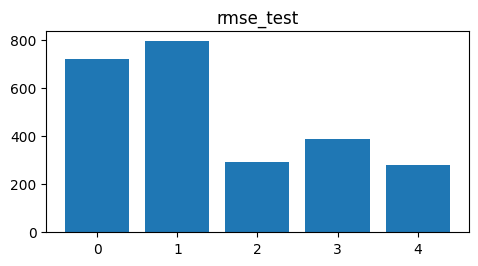

In [30]:
cv = KFold(n_splits=5, shuffle=True,random_state=42)

rmse_test_arr = []
rrmse_test_arr =[]
r2_test_arr= []
mae_test_arr = []

rmse_train_arr = []
rrmse_train_arr =[]
r2_train_arr= []
mae_train_arr = []

bias_test_arr = []
bias_train_arr = []

for tr, tt in cv.split(df_train): #tr,tt are indexes
    x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
    y_train, y_test = df_train['prod'].iloc[tr], df_train['prod'].iloc[tt]
    print(tr,tt)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(x_train)
    X_test = scaler.transform(x_test)
    model = LinearRegression().fit(X_train, y_train)
    y_pred= model.predict(X_test)
    y_pred_train= model.predict(X_train)

    r2_test=r2_score(y_test,y_pred)
    r2_train=r2_score(y_train,y_pred_train)
    #print(r2_test)
    #print(r2_train)
    r2_test_arr.append(r2_test)
    r2_train_arr.append(r2_train)

    rmse_test = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
    #print("\nRMSE test: ", rmse_test)
    rmse_test_arr.append(rmse_test)

    rrmse_test = format(float(rmse_test*100/np.mean(y_test)),'.2f')
    #print("\nRRMSE test: ", rrmse_test,"%")
    rrmse_test_arr.append(rrmse_test)

    rmse_train = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train)), '.3f'))
    #print("\nRMSE train: ", rmse_train)
    rmse_train_arr.append(rmse_train)

    rrmse_train = format(float(rmse_train*100/np.mean(y_train)),'.2f')
    #print("\nRRMSE train: ", rrmse_train,"%")
    rrmse_train_arr.append(rrmse_train)

    mae_test = float(format(mean_absolute_error(y_test, y_pred), '.3f'))
    #print("\nMAE Test: ", mae_test)
    mae_test_arr.append(mae_test)
    mae_train = float(format(mean_absolute_error(y_train, y_pred_train), '.3f'))
    #print("\nMAE Train: ", mae_train)
    mae_train_arr.append(mae_train)

    #print("\nBias Test: \n", bias_value(y_test,y_pred))
    bias_test_arr.append(bias_value(y_test,y_pred))
    #print("\nBias Train: \n", bias_value(y_train, y_pred_train))
    bias_train_arr.append(bias_value(y_train, y_pred_train))

data['Method'][0]='Linear Regression'
data['RMSE test'][0]=np.mean(rmse_test_arr)
data['RMSE train'][0]=np.mean(rmse_train_arr)
data['RRMSE test'][0]=np.mean(np.array(rrmse_test_arr).astype(np.float64))
data['RRMSE train'][0]=np.mean(np.array(rrmse_train_arr).astype(np.float64))
data['MAE test'][0]=np.mean(mae_test_arr)
data['MAE train'][0]=np.mean(mae_train_arr)
data['R2_score test'][0]=np.mean(r2_test_arr)
data['R2_score train'][0]=np.mean(r2_train_arr)
data['Bias test'][0]=np.mean(bias_test_arr)
data['Bias train'][0]=np.mean(bias_train_arr)

#print(np.array(rmse_test_arr).astype(np.float64))
print(rmse_test_arr)
print(sum(rmse_test_arr)/5)
plt.figure(figsize=(12,12))
plt.subplot(4, 2, 1)
plt.title("rmse_test")
plt.bar([x for x in [0,1,2,3,4]],[rmse_test_arr[x] for x in [0,1,2,3,4]])

[0, 1, 2, 3, 4, 5, 7, 8, 9, 11, 12, 13, 15, 16, 17, 18, 20, 21, 22, 23] [6, 10, 14, 19]

RMSE test:  670.089

RRMSE test:  14.32 %


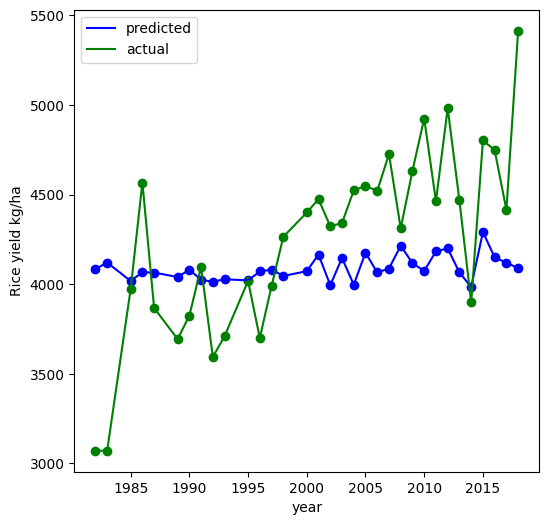

In [31]:

tr = [ 0 , 1 , 2, 3, 4, 5 ,  7,  8,  9, 11, 12, 13, 15, 16, 17, 18, 20, 21, 22, 23]
tt = [ 6,10,14,19]
x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
y_train, y_test = df_train['prod'].iloc[tr], df_train['prod'].iloc[tt]
print(tr,tt)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
model = LinearRegression().fit(X_train, y_train)

x_ = df_test[selected_features_final]
y_ = df_test['prod']
y_pred_ = model.predict(scaler.transform(x_))

rmse_test = float(format(np.sqrt(mean_squared_error(y_pred_, y_)), '.3f'))
print("\nRMSE test: ", rmse_test)

rrmse_test = format(float(rmse_test*100/np.mean(y_)),'.2f')

print("\nRRMSE test: ", rrmse_test,"%")
x__=df[selected_features_final]
y__=df['prod']
y__pred__=model.predict(scaler.transform(x__))

plt.figure(figsize=(6,6))
plt.scatter(df['year'], y__pred__,color='b')
plt.plot(df['year'],y__pred__,color='b',label='predicted')
plt.scatter(df['year'],y__,color='g')
plt.plot(df['year'],y__,color='g',label='actual')
plt.xlabel("year")
plt.ylabel("Rice yield kg/ha")
plt.legend()
plt.show()

test_acc['Method'][0]='Linear Regression'
test_acc['RMSE test'][0]=rmse_test
test_acc['RRMSE test'][0]=rrmse_test
test_acc['MAE test'][0]=float(format(mean_absolute_error(y_pred_, y_), '.3f'))
test_acc['R2_score test'][0]=r2_score(y_,y_pred_)
test_acc['Bias test'][0]=bias_value(y_,y_pred_)

##SVR

[ 1  2  3  4  5  6  7  9 10 12 13 14 15 17 19 20 21 22 23] [ 0  8 11 16 18]
[ 0  2  3  4  6  7  8 10 11 12 14 15 16 17 18 19 20 22 23] [ 1  5  9 13 21]
[ 0  1  5  6  7  8  9 10 11 13 14 16 17 18 19 20 21 22 23] [ 2  3  4 12 15]
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 18 19 21] [ 7 17 20 22 23]
[ 0  1  2  3  4  5  7  8  9 11 12 13 15 16 17 18 20 21 22 23] [ 6 10 14 19]
[672.638, 700.285, 301.095, 431.289, 290.032]


<BarContainer object of 5 artists>

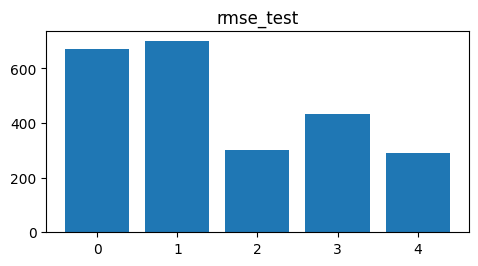

In [32]:


cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through CV splits
rmse_test_arr = []
rrmse_test_arr =[]
r2_test_arr= []
mae_test_arr = []

rmse_train_arr = []
rrmse_train_arr =[]
r2_train_arr= []
mae_train_arr = []

bias_test_arr = []
bias_train_arr = []


for tr, tt in cv.split(df_train): #tr,tt are indexes
    x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
    y_train, y_test = df_train['prod'].iloc[tr], df_train['prod'].iloc[tt]
    print(tr,tt)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(x_train)
    X_test = scaler.transform(x_test)
    model = SVR().fit(X_train, y_train)
    y_pred= model.predict(X_test)
    y_pred_train= model.predict(X_train)

    r2_test=r2_score(y_test,y_pred)
    r2_train=r2_score(y_train,y_pred_train)
    #print(r2_test)
    #print(r2_train)
    r2_test_arr.append(r2_test)
    r2_train_arr.append(r2_train)

    rmse_test = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
    #print("\nRMSE test: ", rmse_test)
    rmse_test_arr.append(rmse_test)

    rrmse_test = format(float(rmse_test*100/np.mean(y_test)),'.2f')
    #print("\nRRMSE test: ", rrmse_test,"%")
    rrmse_test_arr.append(rrmse_test)

    rmse_train = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train)), '.3f'))
    #print("\nRMSE train: ", rmse_train)
    rmse_train_arr.append(rmse_train)

    rrmse_train = format(float(rmse_train*100/np.mean(y_train)),'.2f')
    #print("\nRRMSE train: ", rrmse_train,"%")
    rrmse_train_arr.append(rrmse_train)


    mae_test = float(format(mean_absolute_error(y_test, y_pred), '.3f'))
    #print("\nMAE Test: ", mae_test)
    mae_test_arr.append(mae_test)
    mae_train = float(format(mean_absolute_error(y_train, y_pred_train), '.3f'))
    #print("\nMAE Train: ", mae_train)
    mae_train_arr.append(mae_train)

                #print("\nBias Test: \n", bias_value(y_test,y_pred))
    bias_test_arr.append(bias_value(y_test,y_pred))
    #print("\nBias Train: \n", bias_value(y_train, y_pred_train))
    bias_train_arr.append(bias_value(y_train, y_pred_train))

data['Method'][1]='SVR'
data['RMSE test'][1]=np.mean(rmse_test_arr)
data['RMSE train'][1]=np.mean(rmse_train_arr)
data['RRMSE test'][1]=np.mean(np.array(rrmse_test_arr).astype(np.float64))
data['RRMSE train'][1]=np.mean(np.array(rrmse_train_arr).astype(np.float64))
data['MAE test'][1]=np.mean(mae_test_arr)
data['MAE train'][1]=np.mean(mae_train_arr)
data['R2_score test'][1]=np.mean(r2_test_arr)
data['R2_score train'][1]=np.mean(r2_train_arr)
data['Bias test'][1]=np.mean(bias_test_arr)
data['Bias train'][1]=np.mean(bias_train_arr)
print(rmse_test_arr)
plt.figure(figsize=(12,12))
plt.subplot(4, 2, 1)
plt.title("rmse_test")
plt.bar([x for x in [0,1,2,3,4]],[rmse_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 2)
# plt.title("rmse_train")
# plt.bar([x for x in [0,1,2,3,4]],[rmse_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 3)
# plt.title("rrmse_test")
# plt.bar([x for x in [0,1,2,3,4]],[rrmse_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 4)
# plt.title("rrmse_train")
# plt.bar([x for x in [0,1,2,3,4]],[rrmse_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 5)
# plt.title("r2_test")
# plt.bar([x for x in [0,1,2,3,4]],[r2_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 6)
# plt.title("r2_train")
# plt.bar([x for x in [0,1,2,3,4]],[r2_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 7)
# plt.title("mae_test")
# plt.bar([x for x in [0,1,2,3,4]],[mae_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 8)
# plt.title("mae_train")
# plt.bar([x for x in [0,1,2,3,4]],[mae_train_arr[x] for x in [0,1,2,3,4]])
# plt.show()



In [33]:
tr = [ 0 , 1 , 2, 3,  4, 5,  7,  8,  9, 11, 12, 13, 15, 16, 17, 18, 20, 21, 22, 23]
tt = [ 6, 10, 14, 19]
x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
y_train, y_test = df_train['prod'].iloc[tr], df_train['prod'].iloc[tt]
print(tr,tt)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
model = SVR().fit(X_train, y_train)

x_ = df_test[selected_features_final]
y_ = df_test['prod']
y_pred_ = model.predict(scaler.transform(x_))

rmse_test = float(format(np.sqrt(mean_squared_error(y_pred_, y_)), '.3f'))
print("\nRMSE test: ", rmse_test)

rrmse_test = format(float(rmse_test*100/np.mean(y_)),'.2f')
print("\nRRMSE test: ", rrmse_test,"%")


test_acc['Method'][1]='SVR'
test_acc['RMSE test'][1]=rmse_test
test_acc['RRMSE test'][1]=rrmse_test
test_acc['MAE test'][1]=float(format(mean_absolute_error(y_pred_, y_), '.3f'))
test_acc['R2_score test'][1]=r2_score(y_,y_pred_)
test_acc['Bias test'][1]=bias_value(y_,y_pred_)

[0, 1, 2, 3, 4, 5, 7, 8, 9, 11, 12, 13, 15, 16, 17, 18, 20, 21, 22, 23] [6, 10, 14, 19]

RMSE test:  643.363

RRMSE test:  13.75 %


##MLP

[ 1  2  3  4  5  6  7  9 10 12 13 14 15 17 19 20 21 22 23] [ 0  8 11 16 18]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


[ 0  2  3  4  6  7  8 10 11 12 14 15 16 17 18 19 20 22 23] [ 1  5  9 13 21]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


[ 0  1  5  6  7  8  9 10 11 13 14 16 17 18 19 20 21 22 23] [ 2  3  4 12 15]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 18 19 21] [ 7 17 20 22 23]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


[ 0  1  2  3  4  5  7  8  9 11 12 13 15 16 17 18 20 21 22 23] [ 6 10 14 19]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


<BarContainer object of 5 artists>

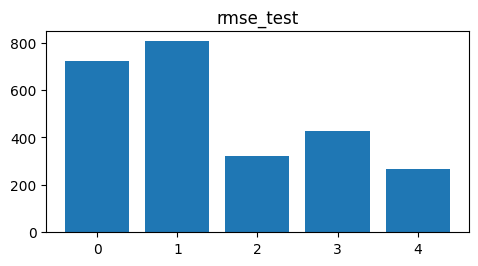

In [34]:

cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through CV splits
rmse_test_arr = []
rrmse_test_arr =[]
r2_test_arr= []
mae_test_arr = []

rmse_train_arr = []
rrmse_train_arr =[]
r2_train_arr= []
mae_train_arr = []

bias_test_arr = []
bias_train_arr = []


for tr, tt in cv.split(df_train): #tr,tt are indexes
    x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
    y_train, y_test = df_train['prod'].iloc[tr], df_train['prod'].iloc[tt]
    scaler = MinMaxScaler()
    print(tr,tt)
    X_train = scaler.fit_transform(x_train)
    X_test = scaler.transform(x_test)
    model = MLPRegressor(hidden_layer_sizes=(64,64,64),activation="relu" ,random_state=1, max_iter=2000).fit(X_train, y_train)
    y_pred= model.predict(X_test)
    y_pred_train= model.predict(X_train)

    r2_test=r2_score(y_test,y_pred)
    r2_train=r2_score(y_train,y_pred_train)
    #print(r2_test)
    #print(r2_train)
    r2_test_arr.append(r2_test)
    r2_train_arr.append(r2_train)

    rmse_test = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
    #print("\nRMSE test: ", rmse_test)
    rmse_test_arr.append(rmse_test)

    rrmse_test = format(float(rmse_test*100/np.mean(y_test)),'.2f')
    #print("\nRRMSE test: ", rrmse_test,"%")
    rrmse_test_arr.append(rrmse_test)

    rmse_train = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train)), '.3f'))
    #print("\nRMSE train: ", rmse_train)
    rmse_train_arr.append(rmse_train)

    rrmse_train = format(float(rmse_train*100/np.mean(y_train)),'.2f')
    #print("\nRRMSE train: ", rrmse_train,"%")
    rrmse_train_arr.append(rrmse_train)


    mae_test = float(format(mean_absolute_error(y_test, y_pred), '.3f'))
    #print("\nMAE Test: ", mae_test)
    mae_test_arr.append(mae_test)
    mae_train = float(format(mean_absolute_error(y_train, y_pred_train), '.3f'))
    #print("\nMAE Train: ", mae_train)
    mae_train_arr.append(mae_train)

                #print("\nBias Test: \n", bias_value(y_test,y_pred))
    bias_test_arr.append(bias_value(y_test,y_pred))
    #print("\nBias Train: \n", bias_value(y_train, y_pred_train))
    bias_train_arr.append(bias_value(y_train, y_pred_train))

data['Method'][2]='MLP'
data['RMSE test'][2]=np.mean(rmse_test_arr)
data['RMSE train'][2]=np.mean(rmse_train_arr)
data['RRMSE test'][2]=np.mean(np.array(rrmse_test_arr).astype(np.float64))
data['RRMSE train'][2]=np.mean(np.array(rrmse_train_arr).astype(np.float64))
data['MAE test'][2]=np.mean(mae_test_arr)
data['MAE train'][2]=np.mean(mae_train_arr)
data['R2_score test'][2]=np.mean(r2_test_arr)
data['R2_score train'][2]=np.mean(r2_train_arr)
data['Bias test'][2]=np.mean(bias_test_arr)
data['Bias train'][2]=np.mean(bias_train_arr)

plt.figure(figsize=(12,12))
plt.subplot(4, 2, 1)
plt.title("rmse_test")
plt.bar([x for x in [0,1,2,3,4]],[rmse_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 2)
# plt.title("rmse_train")
# plt.bar([x for x in [0,1,2,3,4]],[rmse_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 3)
# plt.title("rrmse_test")
# plt.bar([x for x in [0,1,2,3,4]],[rrmse_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 4)
# plt.title("rrmse_train")
# plt.bar([x for x in [0,1,2,3,4]],[rrmse_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 5)
# plt.title("r2_test")
# plt.bar([x for x in [0,1,2,3,4]],[r2_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 6)
# plt.title("r2_train")
# plt.bar([x for x in [0,1,2,3,4]],[r2_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 7)
# plt.title("mae_test")
# plt.bar([x for x in [0,1,2,3,4]],[mae_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 8)
# plt.title("mae_train")
# plt.bar([x for x in [0,1,2,3,4]],[mae_train_arr[x] for x in [0,1,2,3,4]])
# plt.show()



[0, 1, 2, 3, 4, 5, 7, 8, 9, 11, 12, 13, 15, 16, 17, 18, 20, 21, 22, 23] [6, 10, 14, 19]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(



RMSE test:  616.488

RRMSE test:  13.18 %


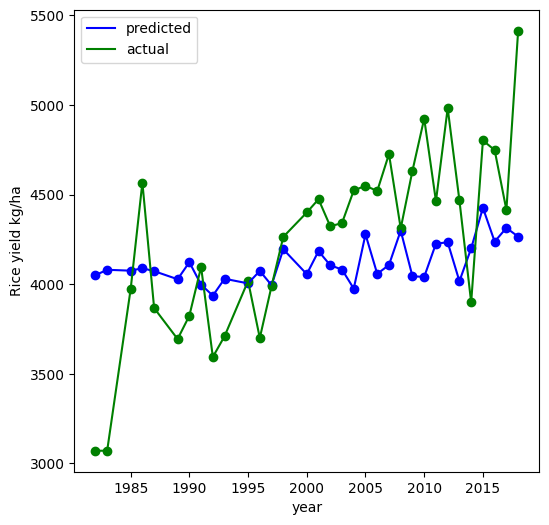

In [35]:
tr = [ 0,  1,  2,  3,  4,  5,  7,  8,  9, 11, 12, 13, 15, 16, 17, 18, 20, 21, 22, 23]
tt = [ 6, 10, 14, 19]
x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
y_train, y_test = df_train['prod'].iloc[tr], df_train['prod'].iloc[tt]
print(tr,tt)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
model = MLPRegressor(hidden_layer_sizes=(64,64,64),activation="relu" ,random_state=1, max_iter=2000).fit(X_train, y_train)

x_ = df_test[selected_features_final]
y_ = df_test['prod']
y_pred_ = model.predict(scaler.transform(x_))

rmse_test = float(format(np.sqrt(mean_squared_error(y_pred_, y_)), '.3f'))
print("\nRMSE test: ", rmse_test)

rrmse_test = format(float(rmse_test*100/np.mean(y_)),'.2f')
print("\nRRMSE test: ", rrmse_test,"%")

x__=df[selected_features_final]
y__=df['prod']
y__pred__=model.predict(scaler.transform(x__))

plt.figure(figsize=(6,6))
plt.scatter(df['year'], y__pred__,color='b')
plt.plot(df['year'],y__pred__,color='b',label='predicted')
plt.scatter(df['year'],y__,color='g')
plt.plot(df['year'],y__,color='g',label='actual')
plt.xlabel("year")
plt.ylabel("Rice yield kg/ha")
plt.legend()
plt.show()

test_acc['Method'][2]='MLP'
test_acc['RMSE test'][2]=rmse_test
test_acc['RRMSE test'][2]=rrmse_test
test_acc['MAE test'][2]=float(format(mean_absolute_error(y_pred_, y_), '.3f'))
test_acc['R2_score test'][2]=r2_score(y_,y_pred_)
test_acc['Bias test'][2]=bias_value(y_,y_pred_)

##KNN

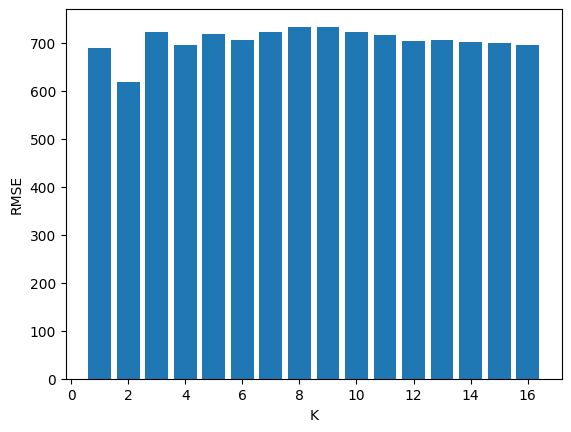

2


In [36]:
X=df_train[selected_features_final]
y=df_train['prod']

x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
K_min = 0
RMSE_min=math.inf
RMSE_list=[0 for t in range(len(x_train))]

for K in range(1,len(x_train)+1):
    model = neighbors.KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_pred= model.predict(X_test)
    rmse_test = float(format(np.sqrt(mean_squared_error(y_pred, y_test)), '.3f'))

    rrmse_test = format(float(rmse_test*100/np.mean(y_test)),'.2f')
    RMSE_list[K-1]=rmse_test
    if RMSE_min > rmse_test:
      RMSE_min = rmse_test
      K_min = K
plt.bar(np.arange(1,len(x_train)+1), RMSE_list)
plt.xlabel("K")
plt.ylabel("RMSE")
plt.show()

print(K_min)

[ 0  8 11 16 18] [ 1  2  3  4  5  6  7  9 10 12 13 14 15 17 19 20 21 22 23]
[ 1  5  9 13 21] [ 0  2  3  4  6  7  8 10 11 12 14 15 16 17 18 19 20 22 23]
[ 2  3  4 12 15] [ 0  1  5  6  7  8  9 10 11 13 14 16 17 18 19 20 21 22 23]
[ 7 17 20 22 23] [ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 18 19 21]
[ 6 10 14 19] [ 0  1  2  3  4  5  7  8  9 11 12 13 15 16 17 18 20 21 22 23]


<BarContainer object of 5 artists>

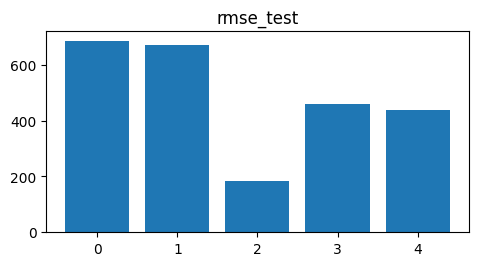

In [37]:


cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through CV splits
rmse_test_arr = []
rrmse_test_arr =[]
r2_test_arr= []
mae_test_arr = []

rmse_train_arr = []
rrmse_train_arr =[]
r2_train_arr= []
mae_train_arr = []

bias_test_arr = []
bias_train_arr = []

K = K_min
for tr, tt in cv.split(df_train): #tr,tt are indexes
    x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
    y_train, y_test = df_train['prod'].iloc[tr], df_train['prod'].iloc[tt]
    print(tt,tr)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(x_train)
    X_test = scaler.transform(x_test)

    model = neighbors.KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_pred= model.predict(X_test)
    y_pred_train= model.predict(X_train)

    r2_test=r2_score(y_test,y_pred)
    r2_train=r2_score(y_train,y_pred_train)
    #print(r2_test)
    #print(r2_train)
    r2_test_arr.append(r2_test)
    r2_train_arr.append(r2_train)

    rmse_test = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
    #print("\nRMSE test: ", rmse_test)
    rmse_test_arr.append(rmse_test)

    rrmse_test = format(float(rmse_test*100/np.mean(y_test)),'.2f')
    #print("\nRRMSE test: ", rrmse_test,"%")
    rrmse_test_arr.append(rrmse_test)

    rmse_train = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train)), '.3f'))
    #print("\nRMSE train: ", rmse_train)
    rmse_train_arr.append(rmse_train)

    rrmse_train = format(float(rmse_train*100/np.mean(y_train)),'.2f')
    #print("\nRRMSE train: ", rrmse_train,"%")
    rrmse_train_arr.append(rrmse_train)


    mae_test = float(format(mean_absolute_error(y_test, y_pred), '.3f'))
    #print("\nMAE Test: ", mae_test)
    mae_test_arr.append(mae_test)
    mae_train = float(format(mean_absolute_error(y_train, y_pred_train), '.3f'))
    #print("\nMAE Train: ", mae_train)
    mae_train_arr.append(mae_train)

                #print("\nBias Test: \n", bias_value(y_test,y_pred))
    bias_test_arr.append(bias_value(y_test,y_pred))
    #print("\nBias Train: \n", bias_value(y_train, y_pred_train))
    bias_train_arr.append(bias_value(y_train, y_pred_train))

data['Method'][3]='KNN'
data['RMSE test'][3]=np.mean(rmse_test_arr)
data['RMSE train'][3]=np.mean(rmse_train_arr)
data['RRMSE test'][3]=np.mean(np.array(rrmse_test_arr).astype(np.float64))
data['RRMSE train'][3]=np.mean(np.array(rrmse_train_arr).astype(np.float64))
data['MAE test'][3]=np.mean(mae_test_arr)
data['MAE train'][3]=np.mean(mae_train_arr)
data['R2_score test'][3]=np.mean(r2_test_arr)
data['R2_score train'][3]=np.mean(r2_train_arr)
data['Bias test'][3]=np.mean(bias_test_arr)
data['Bias train'][3]=np.mean(bias_train_arr)

plt.figure(figsize=(12,12))
plt.subplot(4, 2, 1)
plt.title("rmse_test")
plt.bar([x for x in [0,1,2,3,4]],[rmse_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 2)
# plt.title("rmse_train")
# plt.bar([x for x in [0,1,2,3,4]],[rmse_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 3)
# plt.title("rrmse_test")
# plt.bar([x for x in [0,1,2,3,4]],[rrmse_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 4)
# plt.title("rrmse_train")
# plt.bar([x for x in [0,1,2,3,4]],[rrmse_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 5)
# plt.title("r2_test")
# plt.bar([x for x in [0,1,2,3,4]],[r2_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 6)
# plt.title("r2_train")
# plt.bar([x for x in [0,1,2,3,4]],[r2_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 7)
# plt.title("mae_test")
# plt.bar([x for x in [0,1,2,3,4]],[mae_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 8)
# plt.title("mae_train")
# plt.bar([x for x in [0,1,2,3,4]],[mae_train_arr[x] for x in [0,1,2,3,4]])
# plt.show()



[0, 1, 5, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23] [2, 3, 4, 12, 15]

RMSE test:  870.196

RRMSE test:  18.60 %


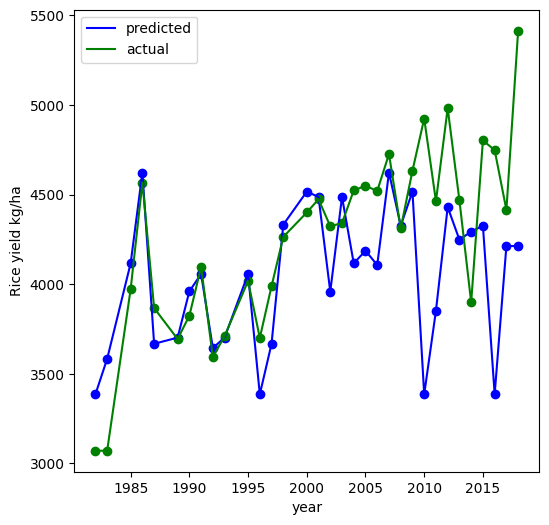

In [38]:
tr = [ 0 , 1 , 5 , 6,  7,  8,  9, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23]
tt = [ 2 , 3 , 4 ,12, 15]
x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
y_train, y_test = df_train['prod'].iloc[tr], df_train['prod'].iloc[tt]
print(tr,tt)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

model = neighbors.KNeighborsRegressor(n_neighbors = K_min).fit(X_train, y_train)
x_ = df_test[selected_features_final]
y_ = df_test['prod']
y_pred_ = model.predict(scaler.transform(x_))

rmse_test = float(format(np.sqrt(mean_squared_error(y_pred_, y_)), '.3f'))
print("\nRMSE test: ", rmse_test)

rrmse_test = format(float(rmse_test*100/np.mean(y_)),'.2f')
print("\nRRMSE test: ", rrmse_test,"%")
x__=df[selected_features_final]
y__=df['prod']
y__pred__=model.predict(scaler.transform(x__))

plt.figure(figsize=(6,6))
plt.scatter(df['year'], y__pred__,color='b')
plt.plot(df['year'],y__pred__,color='b',label='predicted')
plt.scatter(df['year'],y__,color='g')
plt.plot(df['year'],y__,color='g',label='actual')
plt.xlabel("year")
plt.ylabel("Rice yield kg/ha")
plt.legend()
plt.savefig("AM_KNN_full.jpg",dpi=1200)
plt.show()

test_acc['Method'][3]='KNN'
test_acc['RMSE test'][3]=rmse_test
test_acc['RRMSE test'][3]=rrmse_test
test_acc['MAE test'][3]=float(format(mean_absolute_error(y_pred_, y_), '.3f'))
test_acc['R2_score test'][3]=r2_score(y_,y_pred_)
test_acc['Bias test'][3]=bias_value(y_,y_pred_)

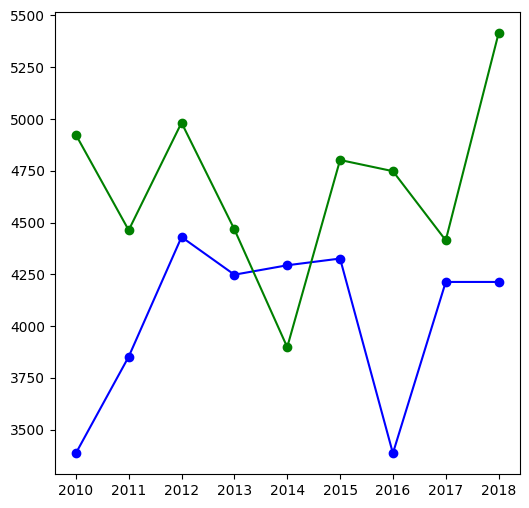

In [39]:

plt.figure(figsize=(6,6))
plt.scatter(df_test['year'], y_pred_,color='b')
plt.plot(df_test['year'],y_pred_,color='b')
plt.scatter(df_test['year'],y_,color='g')
plt.plot(df_test['year'],y_,color='g')
plt.savefig("AM_KNN_pred.jpg",dpi=1200)
plt.show()


##Random Forest

In [40]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through CV splits
rmse_test_arr = []
rrmse_test_arr =[]
r2_test_arr= []
mae_test_arr = []

rmse_train_arr = []
rrmse_train_arr =[]
r2_train_arr= []
mae_train_arr = []

bias_test_arr = []
bias_train_arr = []

for tr, tt in cv.split(df_train): #tr,tt are indexes
    x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
    y_train, y_test = df_train['prod'].iloc[tr], df_train['prod'].iloc[tt]
    print(tr,tt)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(pd.DataFrame(x_train))
    X_test = scaler.transform(pd.DataFrame(x_test))
    model =  RandomForestRegressor(n_estimators = 1000, random_state = 42).fit(X_train, y_train)
    y_pred= model.predict(X_test)
    y_pred_train= model.predict(X_train)

    r2_test=r2_score(y_test,y_pred)
    r2_train=r2_score(y_train,y_pred_train)
    #print(r2_test)
    #print(r2_train)
    r2_test_arr.append(r2_test)
    r2_train_arr.append(r2_train)

    rmse_test = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
    #print("\nRMSE test: ", rmse_test)
    rmse_test_arr.append(rmse_test)

    rrmse_test = format(float(rmse_test*100/np.mean(y_test)),'.2f')
    #print("\nRRMSE test: ", rrmse_test,"%")
    rrmse_test_arr.append(rrmse_test)

    rmse_train = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train)), '.3f'))
    #print("\nRMSE train: ", rmse_train)
    rmse_train_arr.append(rmse_train)

    rrmse_train = format(float(rmse_train*100/np.mean(y_train)),'.2f')
    #print("\nRRMSE train: ", rrmse_train,"%")
    rrmse_train_arr.append(rrmse_train)


    mae_test = float(format(mean_absolute_error(y_test, y_pred), '.3f'))
    #print("\nMAE Test: ", mae_test)
    mae_test_arr.append(mae_test)
    mae_train = float(format(mean_absolute_error(y_train, y_pred_train), '.3f'))
    #print("\nMAE Train: ", mae_train)
    mae_train_arr.append(mae_train)

    #print("\nBias Test: \n", bias_value(y_test,y_pred))
    bias_test_arr.append(bias_value(y_test,y_pred))
    #print("\nBias Train: \n", bias_value(y_train, y_pred_train))
    bias_train_arr.append(bias_value(y_train, y_pred_train))

data['Method'][4]='Random Forest'
data['RMSE test'][4]=np.mean(rmse_test_arr)
data['RMSE train'][4]=np.mean(rmse_train_arr)
data['RRMSE test'][4]=np.mean(np.array(rrmse_test_arr).astype(np.float64))
data['RRMSE train'][4]=np.mean(np.array(rrmse_train_arr).astype(np.float64))
data['MAE test'][4]=np.mean(mae_test_arr)
data['MAE train'][4]=np.mean(mae_train_arr)
data['R2_score test'][4]=np.mean(r2_test_arr)
data['R2_score train'][4]=np.mean(r2_train_arr)
data['Bias test'][4]=np.mean(bias_test_arr)
data['Bias train'][4]=np.mean(bias_train_arr)

print(np.array(rmse_test_arr).astype(np.float64))
print(sum(np.array(rmse_test_arr))/5)
x_train, x_test = df_train[selected_features_final], df_test[selected_features_final]
y_train, y_test = df_train['prod'], df_test['prod']

X_train = scaler.fit_transform(pd.DataFrame(x_train))
X_test = scaler.transform(pd.DataFrame(x_test))
#model =  RandomForestRegressor(n_estimators = 1000, random_state = 42).fit(X_train, y_train)
y_pred= model.predict(X_test)
rmse_test = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print(rmse_test)

[ 1  2  3  4  5  6  7  9 10 12 13 14 15 17 19 20 21 22 23] [ 0  8 11 16 18]
[ 0  2  3  4  6  7  8 10 11 12 14 15 16 17 18 19 20 22 23] [ 1  5  9 13 21]
[ 0  1  5  6  7  8  9 10 11 13 14 16 17 18 19 20 21 22 23] [ 2  3  4 12 15]
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 18 19 21] [ 7 17 20 22 23]
[ 0  1  2  3  4  5  7  8  9 11 12 13 15 16 17 18 20 21 22 23] [ 6 10 14 19]
[609.788 744.619 208.395 324.913 435.858]
464.7146000000001
1003.168


[0, 1, 5, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23] [2, 3, 4, 12, 15]

RMSE test:  896.463

RRMSE test:  19.16 %


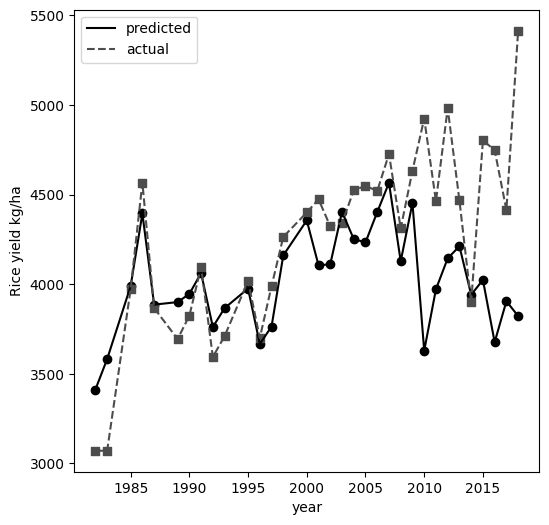

In [41]:
tr = [ 0 , 1 , 5 , 6,  7,  8,  9, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23]
tt = [ 2 , 3 , 4 ,12, 15]

x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
y_train, y_test = df_train['prod'].iloc[tr], df_train['prod'].iloc[tt]
print(tr,tt)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
model =  RandomForestRegressor(n_estimators = 1000, random_state = 42).fit(X_train, y_train)
x_ = df_test[selected_features_final]
y_ = df_test['prod']
y_pred_ = model.predict(scaler.transform(x_))

rmse_test = float(format(np.sqrt(mean_squared_error(y_pred_, y_)), '.3f'))
print("\nRMSE test: ", rmse_test)

rrmse_test = format(float(rmse_test*100/np.mean(y_)),'.2f')
print("\nRRMSE test: ", rrmse_test,"%")

x__=df[selected_features_final]
y__=df['prod']
y__pred__=model.predict(scaler.transform(x__))

plt.figure(figsize=(6,6))
plt.scatter(df['year'], y__pred__,color='k')
plt.plot(df['year'],y__pred__,color='k',label='predicted')
plt.scatter(df['year'],y__,color='0.3', marker='s')
plt.plot(df['year'],y__,color='0.3',label='actual',linestyle='dashed')
plt.xlabel("year")
plt.ylabel("Rice yield kg/ha")
plt.legend()
plt.savefig("AM_RF_full.jpg",dpi=1200)
plt.show()

test_acc['Method'][4]='RF'
test_acc['RMSE test'][4]=rmse_test
test_acc['RRMSE test'][4]=rrmse_test
test_acc['MAE test'][4]=float(format(mean_absolute_error(y_pred_, y_), '.3f'))
test_acc['R2_score test'][4]=r2_score(y_,y_pred_)
test_acc['Bias test'][4]=bias_value(y_,y_pred_)

In [42]:
print(df_test)

    year       X1         X2         X3         X4    X5    X6    X7     X8  \
28  2010  1047.60  30.860526  33.280606  26.805712  76.0   5.0  42.0  112.0   
29  2011   786.10  31.025208  34.751407  26.805712  68.2  20.0  41.0  110.0   
30  2012  1230.32  30.816418  34.751407  27.310256  68.2  17.0  39.0  115.0   
31  2013   622.60  30.711538  34.050000  27.874074  78.0  18.0  27.0  109.0   
32  2014   877.60  30.850000  33.280606  26.805712  75.0   1.2  46.6   94.4   
33  2015   719.00  30.921622  34.751407  27.731250  98.8   1.2  22.0   94.4   
34  2016   498.04  30.814103  33.550000  27.723077  98.8   4.0  17.2   94.4   
35  2017   546.78  30.469908  33.672222  26.871382  69.0   9.0  45.0   94.4   
36  2018   641.42  30.469908  33.390000  26.841894  68.2   2.0  46.6   96.0   

      X9        X10        X11  prod  
28  11.0  24.254545  21.877679  4924  
29  13.0  24.615385  21.870000  4463  
30   8.0  24.387500  22.153913  4982  
31  14.0  24.635714  21.843119  4467  
32  28.6  24.7

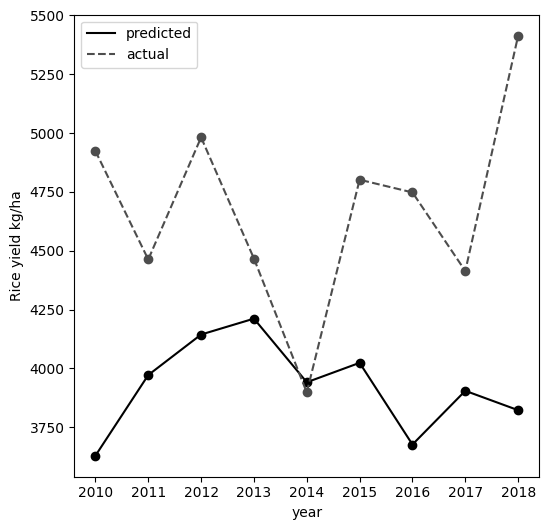

In [43]:
plt.figure(figsize=(6,6))
plt.scatter(df_test['year'], y_pred_,color='k')
plt.plot(df_test['year'],y_pred_,color='k',label='predicted')
plt.scatter(df_test['year'],y_,color='0.3')
plt.plot(df_test['year'],y_,color='0.3',label='actual',linestyle='dashed')
plt.xlabel("year")
plt.ylabel("Rice yield kg/ha")
plt.legend()
plt.savefig("AM_RF_pred.jpg",dpi=1200)

plt.show()

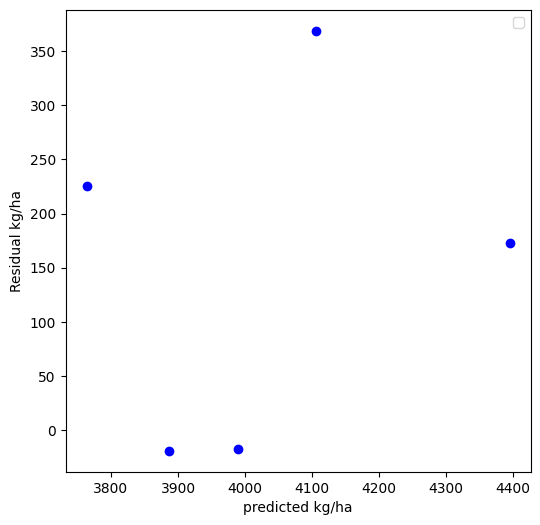

In [44]:
x_val = df_train[selected_features_final].iloc[tt]
y_val = df_train['prod'].iloc[tt]
y_pred_val = model.predict(scaler.transform(x_val))

plt.figure(figsize=(6,6))
plt.scatter(y_pred_val, y_val-y_pred_val, color='b')
#plt.plot(df_test['year'], y_-y_pred_,color='b')
plt.xlabel("predicted kg/ha")
plt.ylabel("Residual kg/ha")
plt.legend()
plt.savefig("AM_RF_res.jpg",dpi=1200)

plt.show()

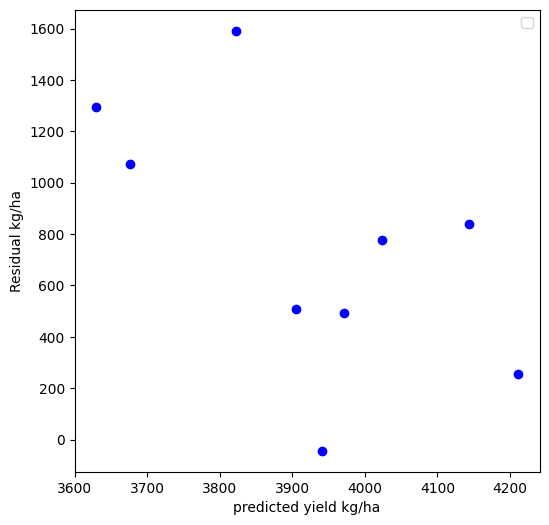

In [45]:
x_val = df_test[selected_features_final]
y_val = df_test['prod']
y_pred_val = model.predict(scaler.transform(x_val))

plt.figure(figsize=(6,6))
plt.scatter(y_pred_val, y_val-y_pred_val, color='b')
#plt.plot(df_test['year'], y_-y_pred_,color='b')
plt.xlabel("predicted yield kg/ha")
plt.ylabel("Residual kg/ha")
plt.legend()
plt.savefig("AM_RF_res.jpg",dpi=1200)

plt.show()

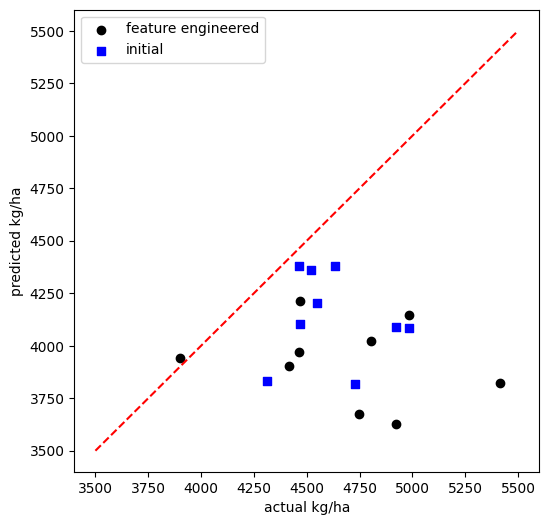

In [46]:
plt.figure(figsize=(6,6))
plt.scatter(y_, y_pred_,color='k',label='feature engineered')
plt.scatter([4549.00, 4520.00, 4726.00, 4311.00, 4633.00, 4924.00, 4463, 4982 , 4467], [4203.264, 4358.221, 3816.955, 3831.993, 4377.739, 4090.723, 4379.629, 4085.058, 4103.643],color='b',label='initial',marker='s')
plt.plot([3500, 5500], [3500, 5500], color='red', linestyle='--')
plt.xlabel("actual kg/ha")
plt.ylabel("predicted kg/ha")
plt.legend()
plt.savefig("AM_RF_pred_.jpg",dpi=1200)

plt.show()

# Results

In [47]:
df_train = pd.DataFrame(data, columns = ['Method', 'RMSE val','RMSE train','RRMSE val','RRMSE train','MAE val','MAE train','R2_score val','R2_score train','Bias val','Bias train'])
print("dataset: ", dataset)
print(df_train)

dataset:  Anuradhapura maha kannaya
              Method RMSE val  RMSE train RRMSE val  RRMSE train MAE val  \
0  Linear Regression      NaN    426.2672       NaN       10.430     NaN   
1                SVR      NaN    464.2908       NaN       11.354     NaN   
2                MLP      NaN    414.9754       NaN       10.152     NaN   
3                KNN      NaN    213.0488       NaN        5.212     NaN   
4      Random Forest      NaN    177.1542       NaN        4.334     NaN   

   MAE train R2_score val  R2_score train Bias val    Bias train  
0   352.6664          NaN        0.091372      NaN  1.531781e-13  
1   366.3136          NaN       -0.086239      NaN -1.080210e+02  
2   339.2340          NaN        0.137678      NaN  5.981030e-03  
3   156.4948          NaN        0.770695      NaN  9.487895e+00  
4   137.7782          NaN        0.841770      NaN  1.938977e+00  


In [48]:
test_acc_df = pd.DataFrame(test_acc, columns = ['Method', 'RMSE test','RRMSE test','MAE test', 'R2_score test','Bias test'])
print(test_acc_df)

              Method  RMSE test RRMSE test  MAE test  R2_score test  \
0  Linear Regression    670.089      14.32   569.754      -1.723646   
1                SVR    643.363      13.75   561.626      -1.510718   
2                MLP    616.488      13.18   528.392      -1.305345   
3                KNN    870.196      18.60   728.500      -3.593255   
4                 RF    896.463      19.16   763.646      -3.874733   

    Bias test  
0  550.565184  
1  498.826770  
2  461.273245  
3  640.611111  
4  754.040444  


In [49]:
df_train.to_csv(r'AM_feature_engineered_train.csv', index = False, header=True)
test_acc_df.to_csv(r'AM_feature_engineered_test.csv',index=False, header=True)